In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
sns.set()

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
bos['MED_PRICE'] = boston.target

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MED_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MED_PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MED_PRICE  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
bos.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MED_PRICE    0
dtype: int64

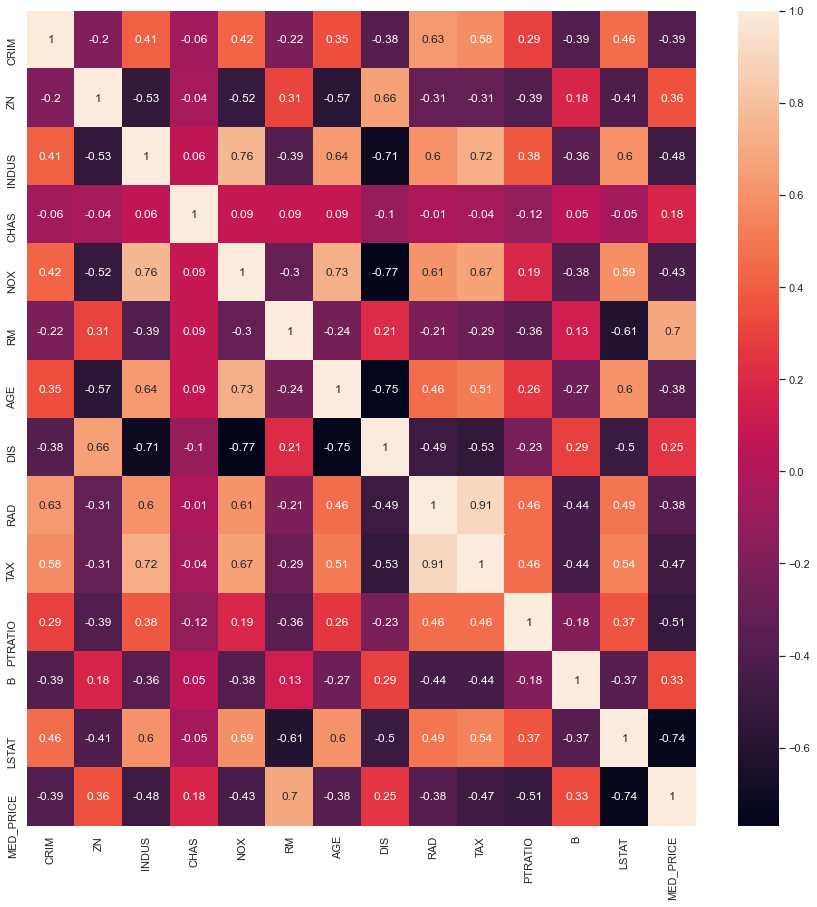

In [9]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,15))
sns.heatmap(data=correlation_matrix, annot=True)

C:\Users\kadiy\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


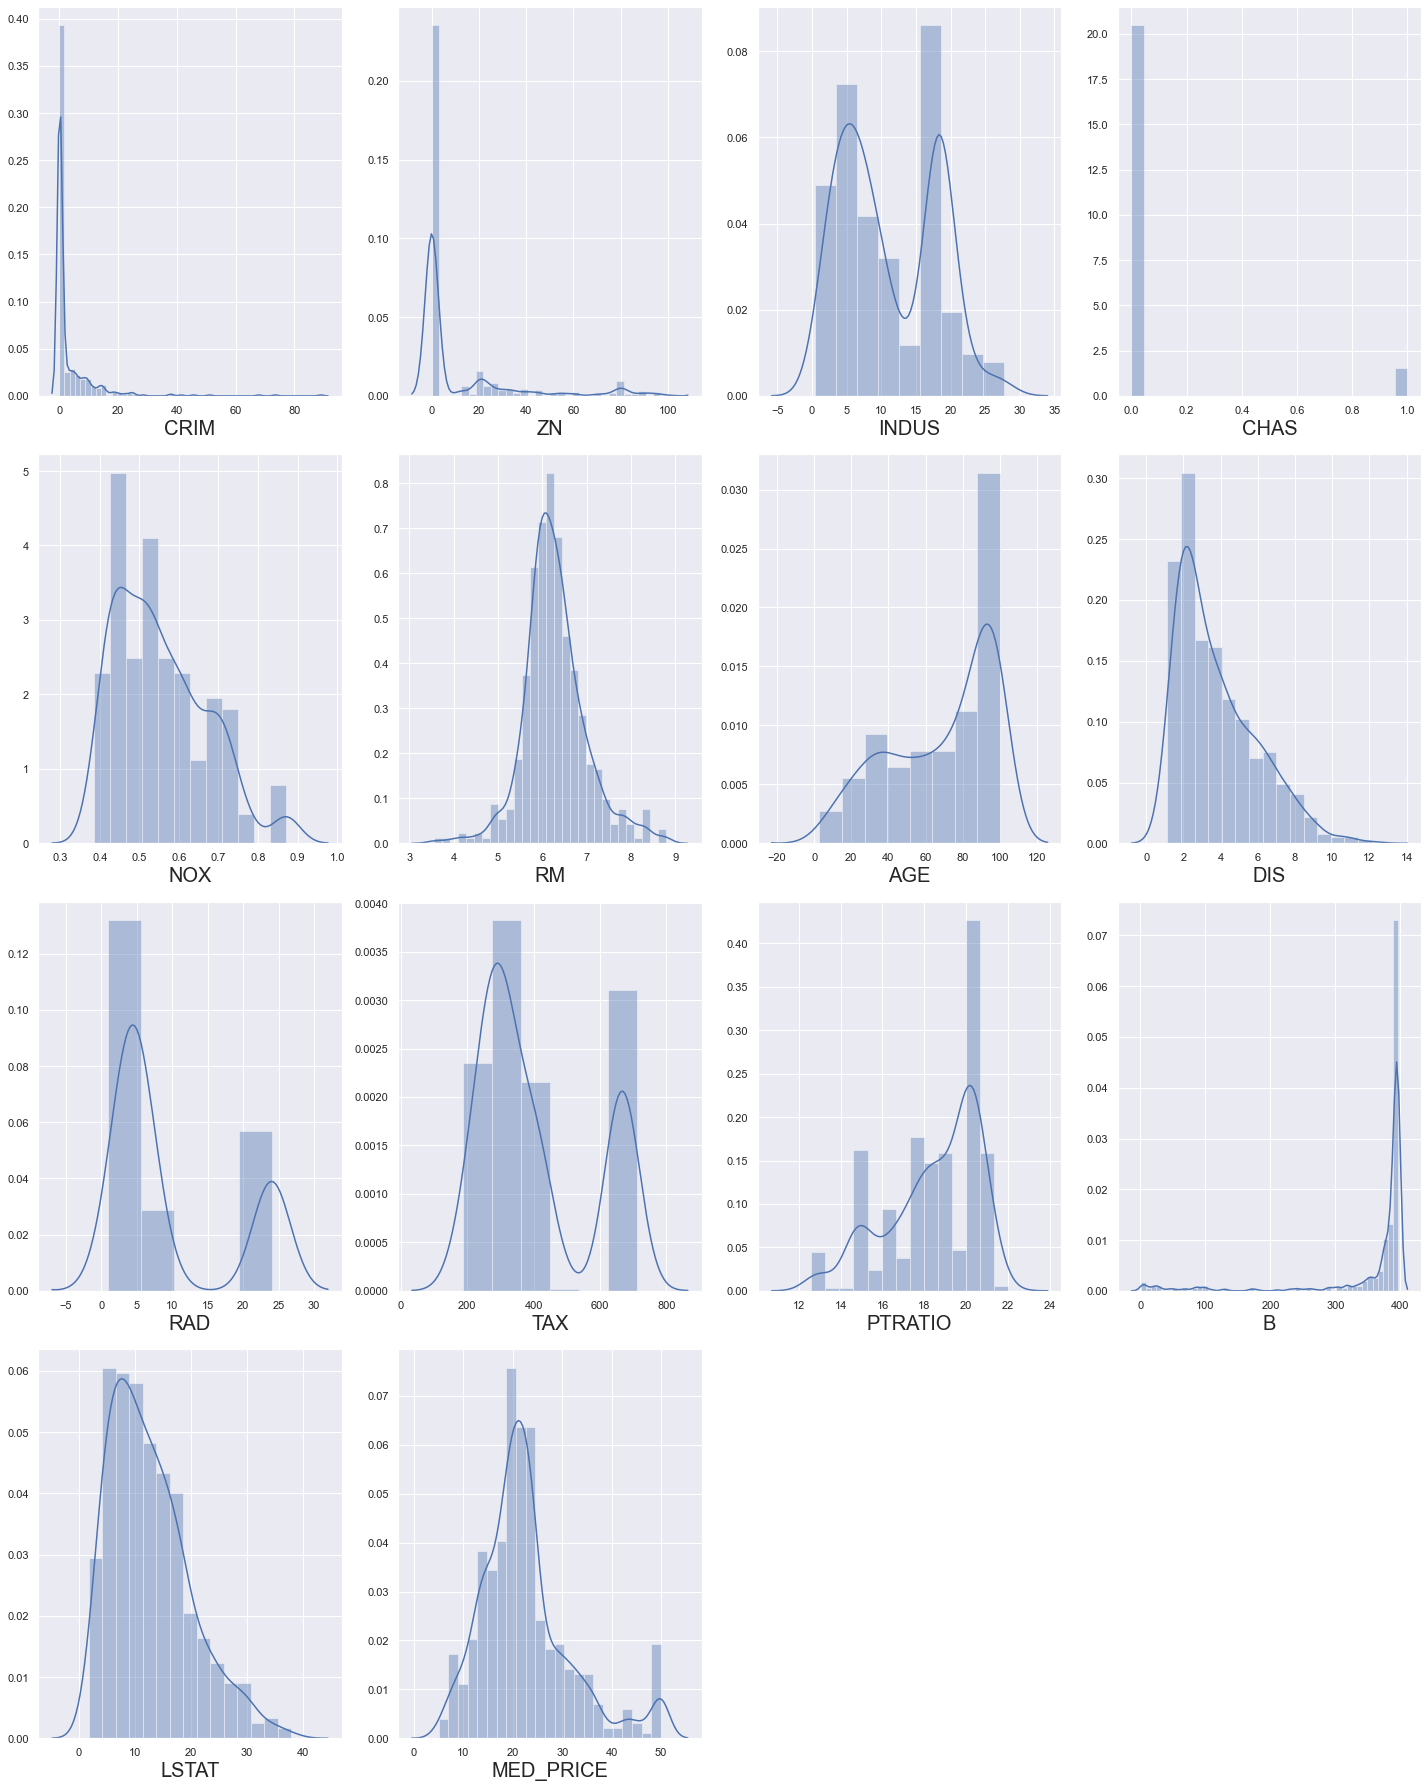

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

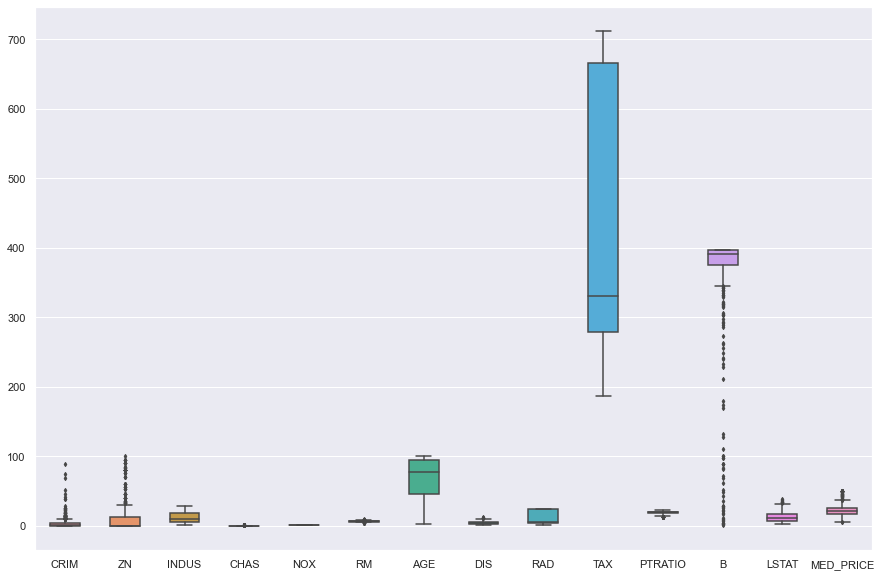

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)

In [29]:
q = bos['CRIM'].quantile(0.95)
# we are removing the top 5% data from the CRIM column
data_cleaned = bos[bos['CRIM']<q]
q = bos['ZN'].quantile(0.95)
# we are removing the top 5% data from the ZN column
data_cleaned = data_cleaned[data_cleaned['ZN']<q]
q = bos['B'].quantile(0.05)
# we are removing the bottom 5% data from the B column
data_cleaned = data_cleaned[data_cleaned['B']>q]
q = bos['LSTAT'].quantile(0.99)
# we are removing the bottom 1% data from the LSTAT column
data_cleaned = data_cleaned[data_cleaned['LSTAT']<q]

C:\Users\kadiy\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


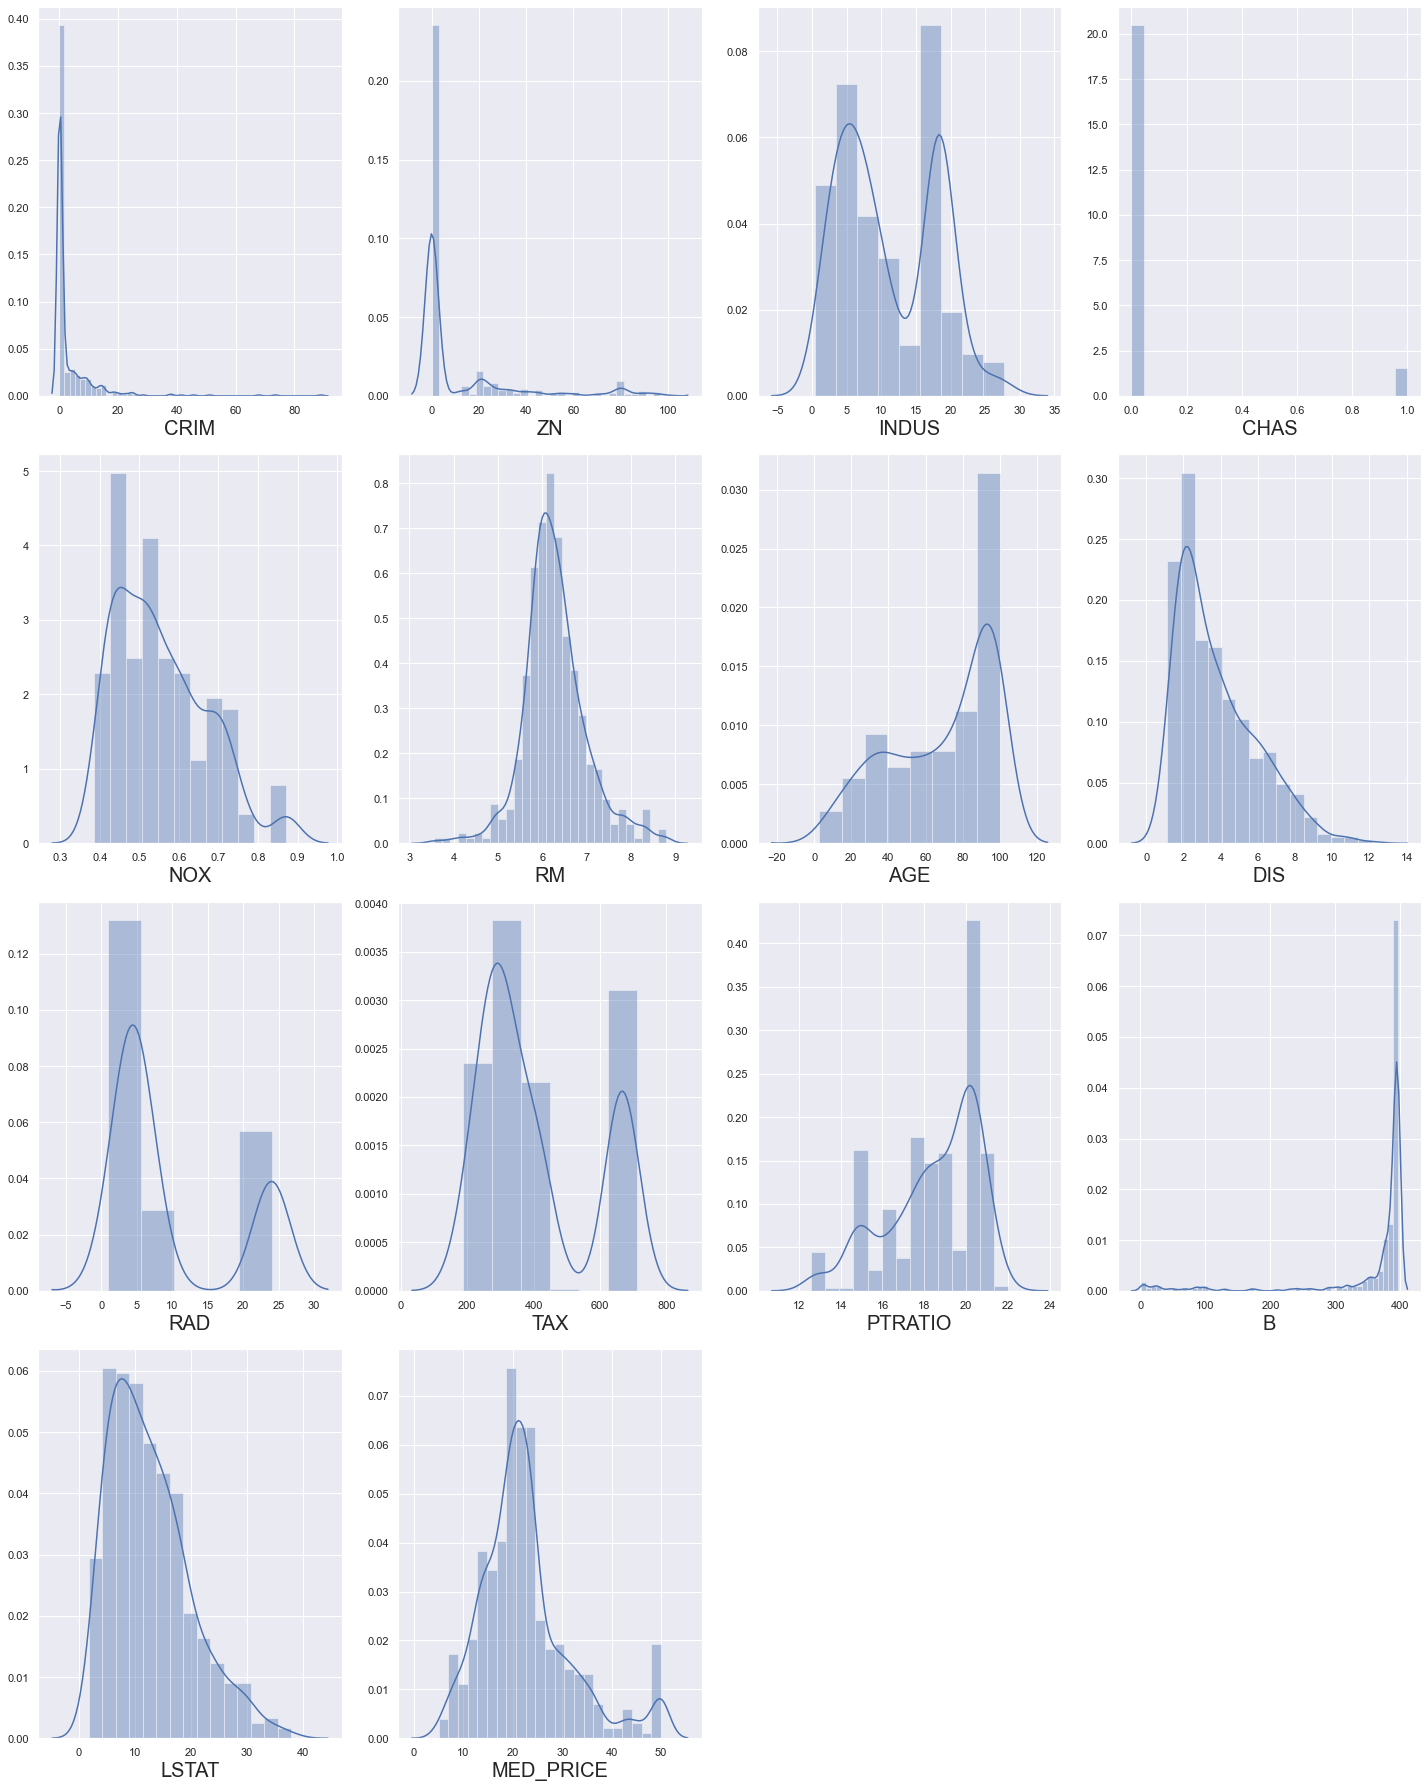

In [30]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [80]:
X = data_cleaned.drop(columns = ['MED_PRICE'])
y = data_cleaned['MED_PRICE']

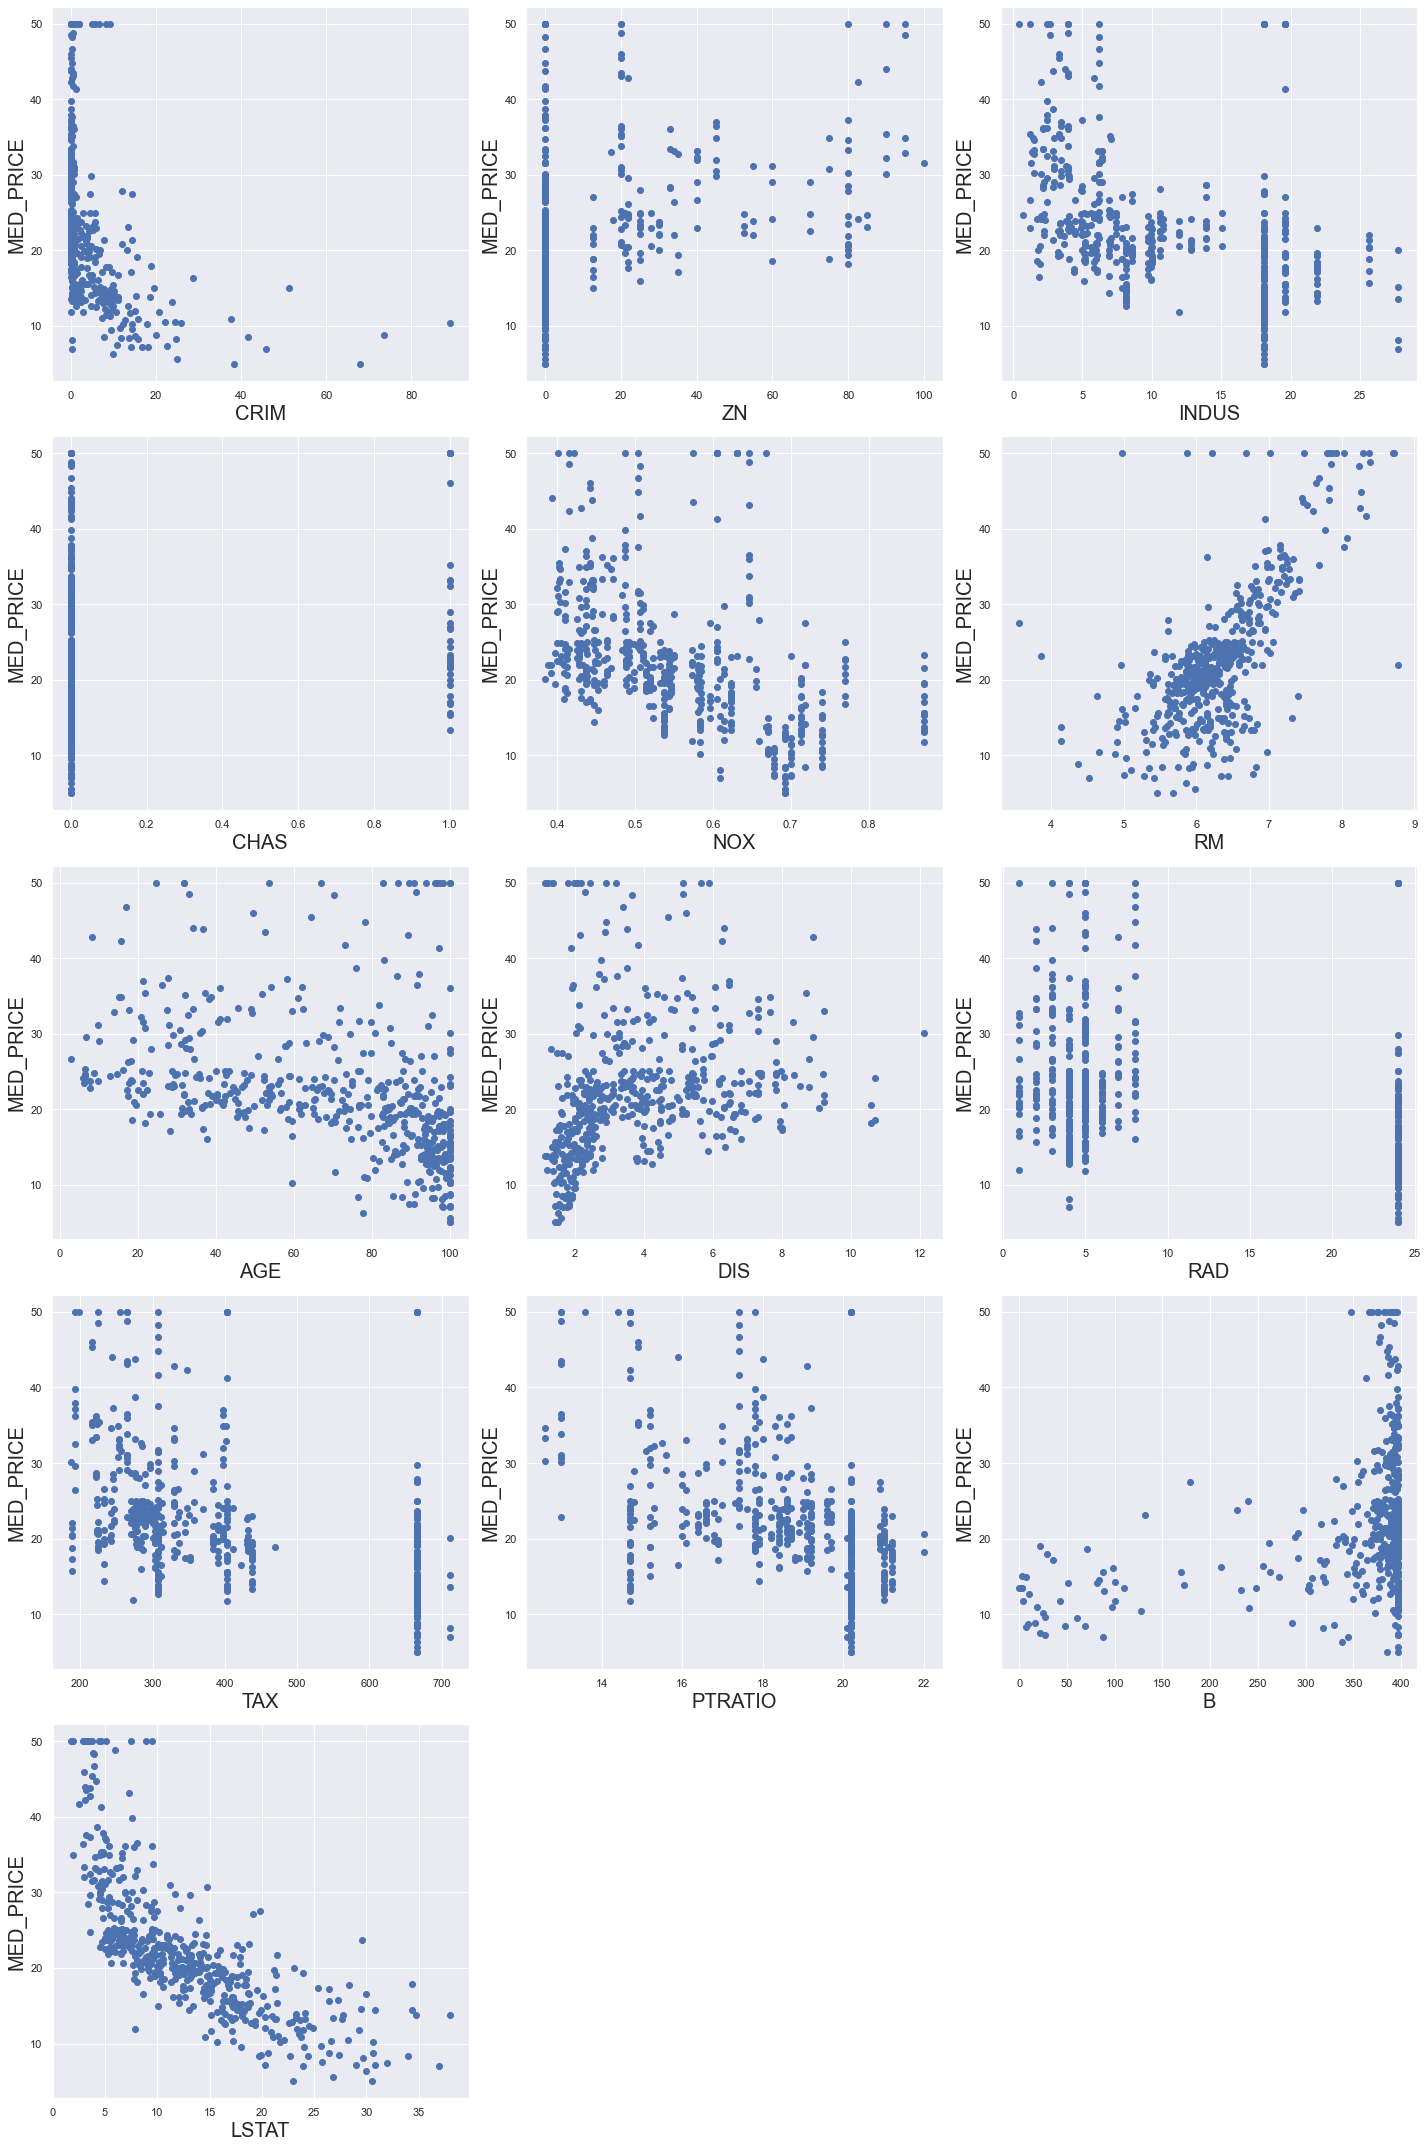

In [12]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MED_PRICE',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [44]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [47]:
vif

,VIF,Features
0,4.685373,CRIM
1,1.891062,ZN
2,3.380892,INDUS
3,1.073091,CHAS
4,4.040762,NOX
5,1.805931,RM
6,2.692141,AGE
7,3.376678,DIS
8,8.326349,RAD
9,7.323551,TAX


In [55]:
X_scaled = X_scaled[:,[0,1,2,3,4,5,6,7,10,11,12]] # removed RAD and TAX

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [57]:
from sklearn.linear_model  import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [58]:
regression.score(x_train,y_train)

0.7315794111086814

In [59]:
adj_r2(x_train,y_train)

0.7220239856141684

In [60]:
regression.score(x_test,y_test)

0.5677649868014247

In [62]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [63]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.007664794467479604

In [64]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.007664794467479604)

In [65]:
lasso_reg.score(x_test, y_test)

0.5680379316089621

In [67]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([7.16149392, 9.74229967, 9.86794867, 4.31862731, 7.98406108,
       5.5166078 , 7.71710477, 0.64371863, 5.18939665, 4.08143633,
       9.28760612, 8.46674192, 2.85789581, 6.47678737, 8.11770008,
       1.85541416, 9.39294407, 1.45188841, 8.7831311 , 2.92175771,
       9.02978096, 8.09354845, 9.3265652 , 8.02523775, 3.22675307,
       5.11267056, 4.34284102, 0.77052175, 7.82476148, 6.60062959,
       4.74753864, 0.02105328, 4.54608687, 7.58910804, 9.01022232,
       8.19008194, 3.34257293, 9.44888253, 6.24368657, 3.54607877,
       4.63539216, 7.93164855, 1.75836917, 4.21823862, 4.7926433 ,
       6.82761764, 3.72080496, 1.24055321, 8.26172415, 1.89147676]),
        cv=10, normalize=True)

In [68]:
ridgecv.alpha_

0.021053280507697947

In [69]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.021053280507697947)

In [70]:
ridge_model.score(x_test, y_test)

0.5677779270258276

In [73]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [74]:
elasticCV.alpha_

0.13521417700803118

In [75]:
elasticCV.l1_ratio

0.5

In [76]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.13521417700803118)

In [77]:
elasticnet_reg.score(x_test, y_test)

0.5730570818735152